In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image
import folium
import pickle
from sodapy import Socrata
from datetime import datetime
import seaborn as sns


%matplotlib inline

In [2]:
energy_endpoint = "https://data.nashville.gov/resource/vbx7-mn5i.json"

In [3]:
energy_params = {'$limit': 15497}

In [4]:
energy_response = requests.get(energy_endpoint, params = energy_params)

In [5]:
energy_response

<Response [200]>

In [6]:
energy_res = energy_response.json()

In [7]:
energy = pd.DataFrame(energy_res)
energy.head()

,year,month,zip_code,customer_type,monthly_kwh_used
0,2015,10,"37219\n(36.167467, -86.783669)",COMMERCIAL,216867
1,2015,9,"37213\n(36.167552, -86.767564)",COMMERCIAL,153407
2,2016,4,37076,OUTDOOR LIGHTING,0
3,2016,4,37214,COMMERCIAL,1149364
4,2016,1,"37208\n(36.176427, -86.805176)",COMMERCIAL,939818


In [8]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15497 entries, 0 to 15496
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              15175 non-null  object
 1   month             15497 non-null  object
 2   zip_code          15497 non-null  object
 3   customer_type     15497 non-null  object
 4   monthly_kwh_used  15175 non-null  object
dtypes: object(5)
memory usage: 605.5+ KB


In [9]:
energy.year.value_counts()

2012    1949
2013    1945
2014    1944
2017    1934
2015    1934
2016    1932
2019    1929
2018    1449
2020     159
Name: year, dtype: int64

In [10]:
energy = energy.dropna(axis = 0)
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15175 entries, 0 to 15496
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              15175 non-null  object
 1   month             15175 non-null  object
 2   zip_code          15175 non-null  object
 3   customer_type     15175 non-null  object
 4   monthly_kwh_used  15175 non-null  object
dtypes: object(5)
memory usage: 711.3+ KB


In [11]:
dates = []
for index_value, row_value in energy.iterrows():
        datestring = str(str(row_value['month']) + '-' + str(row_value['year']))
        dt = datetime.strptime(datestring, '%m-%Y')
        dates += [dt]
type(dates[0])

datetime.datetime

In [12]:
energy['date'] = dates

In [13]:
energy['monthly_kwh_used'] = energy['monthly_kwh_used'].astype('float')
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15175 entries, 0 to 15496
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   year              15175 non-null  object        
 1   month             15175 non-null  object        
 2   zip_code          15175 non-null  object        
 3   customer_type     15175 non-null  object        
 4   monthly_kwh_used  15175 non-null  float64       
 5   date              15175 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 829.9+ KB


In [14]:
energy.customer_type.value_counts()

COMMERCIAL                                        4298
RESIDENTIAL                                       2100
COMCOMM > 50 KW                                   1936
COMCOMM =< 50 KW              COMCOMM 3-PHASE     1870
RESRESIDENTIAL                SRSRESID. SUPPL.    1848
OUTDOOR LIGHTING                                  1399
OLMOLB METERED                                    1270
SEASONAL CUSTOMER                                  250
SEASEAS > 50 KW                                    117
SEASEAS =< 50 KW                                    87
Name: customer_type, dtype: int64

No handles with labels found to put in legend.


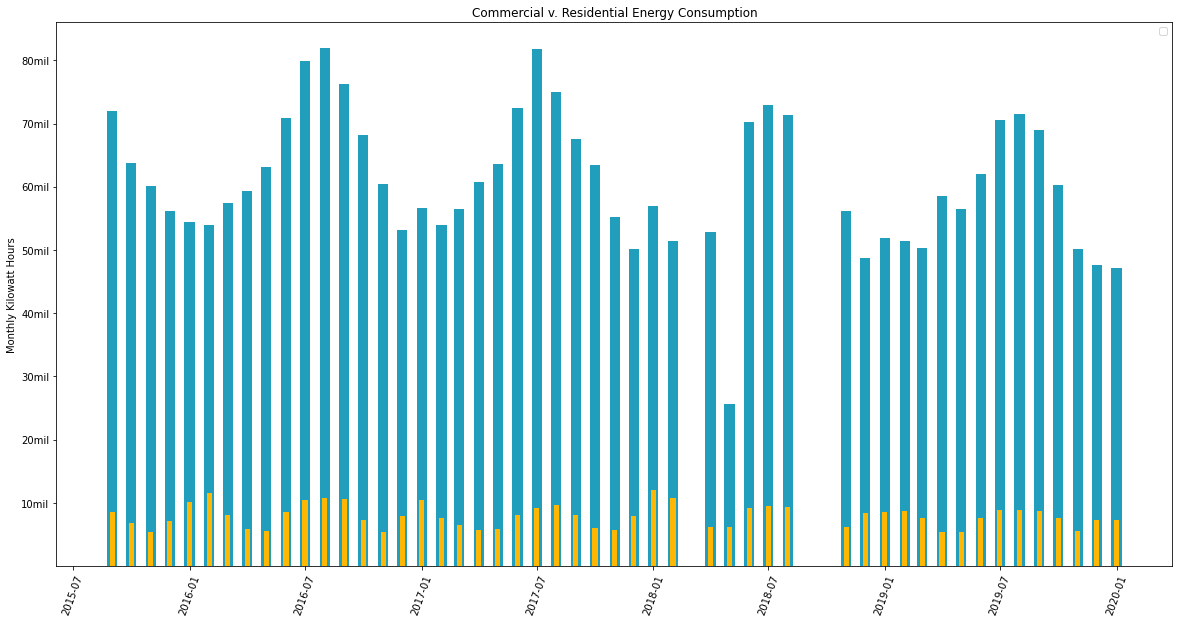

In [34]:
energy.sort_values('date')
commercial = energy.loc[energy['customer_type'] == 'COMMERCIAL']
# commercial = commercial.loc[commercial['monthly_kwh_used'] < 40000000]
residential = energy.loc[energy['customer_type'] == 'RESIDENTIAL']

plt.figure(figsize=(20,10))
plt.title('Commercial v. Residential Energy Consumption')
plt.xticks(rotation = 70)
plt.ylabel("Monthly Kilowatt Hours")
plt.bar('date', 'monthly_kwh_used', data = commercial, color = '#219ebc', width = 16)
plt.yticks(ticks = ([10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000, 110000000]), 
          labels = (['10mil', '20mil', '30mil', '40mil', '50mil', '60mil', '70mil', '80mil', '90mil', '100mil', '110mil']))
# plt.xticks(ticks = ([2015-9, 2015-12, 2016-3, 2016-6, 2016-9, 2016-12, 2017-3, 2017-6, 2017-9, 2017-12,
#                      2018-3, 2018-6, 2018-9, 2018-12, 2019-3, 2019-6, 2019-9, 2019-12, 2020-3])) 
#           labels = (['10mil', '20mil', '30mil', '40mil', '50mil', '60mil', '70mil', '80mil', '90mil', '100mil', '110mil']))
plt.bar('date', 'monthly_kwh_used', data = residential, color = '#ffb703', width = 8)
plt.legend();

In [16]:
building_endpoint = 'https://data.nashville.gov/resource/3h5w-q8b7.json'
building_params = {'$limit': 34226}
building_response = requests.get(building_endpoint, params = building_params)
building_response

<Response [200]>

In [17]:
building_res = building_response.json()
building = pd.DataFrame(building_res)
building.head()

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,...,:@computed_region_v3ji_vzam,:@computed_region_c9xn_skx3,:@computed_region_sjpq_96s8,:@computed_region_kh5x_g7w5,:@computed_region_yf9r_ed6g,:@computed_region_fvtq_wnma,:@computed_region_p6sk_2acq,:@computed_region_b9k3_hpc2,:@computed_region_gxvr_9jxz,:@computed_region_cfa7_hbpz
0,2021014707,Building Residential - New,Single Family Residence,086130A25700CO,2021-03-11T00:00:00.000,2021-04-01T00:00:00.000,351111,4224 MAGNOLIA FARMS DR,HERMITAGE,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020017144,Building Commercial - Rehab,Restaurant (Fast Food),10700005000,2020-03-16T00:00:00.000,2021-04-01T00:00:00.000,499337,1 TERMINAL DR,NASHVILLE,TN,...,2005,18,15807,18,18,44,6,9,38,NaN
2,2021003604,Building Residential - Addition,Single Family Residence,14813016800,2021-01-20T00:00:00.000,2021-04-01T00:00:00.000,109116,361 GILLETTE RD,NASHVILLE,TN,...,2005,28,15803,28,28,46,28,3,3,324
3,2020074008,Building Commercial - New,Restaurant (Fast Food),09116016300,2020-11-25T00:00:00.000,2021-04-01T00:00:00.000,241443,4101 CHARLOTTE AVE D120,NASHVILLE,TN,...,2005,22,15798,22,22,12,10,5,46,NaN
4,2021017122,Building Residential - New,Single Family Residence,072050N06200CO,2021-03-22T00:00:00.000,2021-04-01T00:00:00.000,233508,3061 EDWIN CIR,NASHVILLE,TN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
building = building.drop(columns = [':@computed_region_f73m_vb2k', ':@computed_region_f73m_vb2k', ':@computed_region_v3ji_vzam', 
                                   ':@computed_region_c9xn_skx3', ':@computed_region_sjpq_96s8', ':@computed_region_kh5x_g7w5',
                                  ':@computed_region_yf9r_ed6g', ':@computed_region_fvtq_wnma', ':@computed_region_p6sk_2acq', 
                                   ':@computed_region_b9k3_hpc2', ':@computed_region_gxvr_9jxz', ':@computed_region_cfa7_hbpz',
                                   ':@computed_region_gisn_y5cm'])
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   permit                      34226 non-null  object
 1   permit_type_description     34226 non-null  object
 2   permit_subtype_description  34226 non-null  object
 3   parcel                      34226 non-null  object
 4   date_entered                34226 non-null  object
 5   date_issued                 34226 non-null  object
 6   const_cost                  34225 non-null  object
 7   address                     34226 non-null  object
 8   city                        34225 non-null  object
 9   state                       34226 non-null  object
 10  zip                         34225 non-null  object
 11  subdivision_lot             34226 non-null  object
 12  contact                     34225 non-null  object
 13  per_ty                      34226 non-null  ob

In [19]:
building = building.dropna(axis = 0)
building.isnull().sum()

permit                        0
permit_type_description       0
permit_subtype_description    0
parcel                        0
date_entered                  0
date_issued                   0
const_cost                    0
address                       0
city                          0
state                         0
zip                           0
subdivision_lot               0
contact                       0
per_ty                        0
permit_subtype                0
ivr_trk                       0
purpose                       0
council_dist                  0
census_tract                  0
mapped_location               0
dtype: int64

In [20]:
building['const_cost'] = building['const_cost'].astype('int')

In [21]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33715 entries, 0 to 34225
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   permit                      33715 non-null  object
 1   permit_type_description     33715 non-null  object
 2   permit_subtype_description  33715 non-null  object
 3   parcel                      33715 non-null  object
 4   date_entered                33715 non-null  object
 5   date_issued                 33715 non-null  object
 6   const_cost                  33715 non-null  int32 
 7   address                     33715 non-null  object
 8   city                        33715 non-null  object
 9   state                       33715 non-null  object
 10  zip                         33715 non-null  object
 11  subdivision_lot             33715 non-null  object
 12  contact                     33715 non-null  object
 13  per_ty                      33715 non-null  ob

In [22]:
building.value_counts('permit_type_description')

permit_type_description
Building Residential - New                  12942
Building Residential - Addition              3335
Building Commercial - Rehab                  3075
Building Residential - Rehab                 3054
Building Demolition Permit                   2773
Building Sign Permit                         2357
Building Use & Occupancy                     1605
Building Commercial - Tenant Finish Out      1472
Building Commercial - New                    1141
Building Residential Rehab Storm Damage       228
Building Residential - Roofing / Siding       212
Building Commercial - Roofing / Siding        198
Building Commercial - Shell                   196
Building Commercial - Addition                186
Building Commercial - Foundation              158
Building Commercial Rehab Storm Damage        129
Building Residential - Tenant Finish Out      112
Building Demolition Storm Damage               85
Building Residential New Storm Damage          80
Building Residential - Cha

In [23]:
dates = []
for index_value, row_value in building.iterrows():
        datestring = row_value['date_issued']
        dt = datetime.strptime(datestring, '%Y-%m-%dT%H:%M:%S.%f')
        dates += [dt]
type(dates[0])

datetime.datetime

In [24]:
building['date_issued'] = dates

In [26]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33715 entries, 0 to 34225
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   permit                      33715 non-null  object        
 1   permit_type_description     33715 non-null  object        
 2   permit_subtype_description  33715 non-null  object        
 3   parcel                      33715 non-null  object        
 4   date_entered                33715 non-null  object        
 5   date_issued                 33715 non-null  datetime64[ns]
 6   const_cost                  33715 non-null  int32         
 7   address                     33715 non-null  object        
 8   city                        33715 non-null  object        
 9   state                       33715 non-null  object        
 10  zip                         33715 non-null  object        
 11  subdivision_lot             33715 non-null  object    

In [27]:
resbuild = building[building['permit_type_description'].str.contains("Residential")]
resbuild.sort_values('date_issued', ascending = True)
resbuild.head()

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,...,subdivision_lot,contact,per_ty,permit_subtype,ivr_trk,purpose,council_dist,census_tract,mapped_location,count
0,2021014707,Building Residential - New,Single Family Residence,086130A25700CO,2021-03-11T00:00:00.000,2021-04-01,351111,4224 MAGNOLIA FARMS DR,HERMITAGE,TN,...,LOT 257 MAGNOLIA FARMS PH 3 SEC 1,BEAZER HOMES CORP,CARN,CAA01R301,3945887,To build a 2896 sq. ft. single family house wi...,14,37015609,"{'human_address': '{""address"": ""4224 MAGNOLIA ...",1
2,2021003604,Building Residential - Addition,Single Family Residence,14813016800,2021-01-20T00:00:00.000,2021-04-01,109116,361 GILLETTE RD,NASHVILLE,TN,...,LOT 96 FAIRLANE PARK,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CARA,CAA01R301,3916737,900 sq. ft. addition to side and rear of dwell...,30,37019004,"{'latitude': '36.061404', 'longitude': '-86.70...",1
4,2021017122,Building Residential - New,Single Family Residence,072050N06200CO,2021-03-22T00:00:00.000,2021-04-01,233508,3061 EDWIN CIR,NASHVILLE,TN,...,UNIT 62 HIGH VIEW COTTAGES,"HIGHLAND BUILDING GROUP, EVERGREEN CONSTRUCTIO...",CARN,CAA01R301,3952494,"TO CONSTRUCT 1,926SF SINGLE FAMILY RESIDENCE W...",5,37011300,"{'human_address': '{""address"": ""3061 EDWIN CIR...",1
8,2021003471,Building Residential - New,Single Family Residence,070090R00100CO,2021-01-19T00:00:00.000,2021-04-01,277397,3108A CURTIS ST,NASHVILLE,TN,...,UNIT A HOMES AT 3108 CURTIS STREET,HIGHLAND HOMES LLC,CARN,CAA01R301,3916522,to construct Front Unit A of detached duplex/H...,2,37012801,"{'latitude': '36.198975', 'longitude': '-86.82...",1
9,2021016356,Building Residential - Addition,Single Family Residence,117151B00400CO,2021-03-18T00:00:00.000,2021-04-01,76300,3716B BENHAM AVE,NASHVILLE,TN,...,UNIT 3716B 3714 &3716 BENHAM AVENUE,"PORCH CO INC, THE",CARA,CAA01R301,3950388,"To build a screen porch on back of home, appro...",25,37017800,"{'latitude': '36.108721', 'longitude': '-86.80...",1


In [28]:
commbuild = building[building['permit_type_description'].str.contains("Commercial")]
commbuild.sort_values('date_issued')
commbuild

,permit,permit_type_description,permit_subtype_description,parcel,date_entered,date_issued,const_cost,address,city,state,...,subdivision_lot,contact,per_ty,permit_subtype,ivr_trk,purpose,council_dist,census_tract,mapped_location,count
1,2020017144,Building Commercial - Rehab,Restaurant (Fast Food),10700005000,2020-03-16T00:00:00.000,2021-04-01,499337,1 TERMINAL DR,NASHVILLE,TN,...,LOT 3 METROPOLITAN NASHVILLE AIRPORT AUTHORITY,WELLSPRING BUILDERS INC,CACR,CAF30A203,3785110,TO CONDUCT INTERIOR RENOVATIONS FOR SWETTS BBQ...,13,37980100,"{'latitude': '36.131602', 'longitude': '-86.66...",1
3,2020074008,Building Commercial - New,Restaurant (Fast Food),09116016300,2020-11-25T00:00:00.000,2021-04-01,241443,4101 CHARLOTTE AVE D120,NASHVILLE,TN,...,S SIDE CHARLOTTE AVE E OF 42ND AVE & PT CLOSED...,CARTER GROUP LLC,CACN,CAF30A203,3899561,"Approximately 1,400 square foot unsprinklered ...",24,37013400,"{'latitude': '36.152404', 'longitude': '-86.83...",1
6,2021000874,Building Commercial Rehab Storm Damage,"General Office, Courtrooms",08212034800,2021-01-06T00:00:00.000,2021-04-01,140000,935 WOODLAND ST,NASHVILLE,TN,...,PT LOT 9 PAYNES ADDN TO EDGEFIELD,TENNESSEE TILE & MARBLE CO INC,CACL,CAD02A307,3912362,To renovate and repair the tornado damaged bui...,6,37019200,"{'latitude': '36.17599', 'longitude': '-86.753...",1
24,2020076151,Building Commercial - Rehab,"General Office, Professional Services",09313013600,2020-12-07T00:00:00.000,2021-04-01,2478388,21 MUSIC SQ E,NASHVILLE,TN,...,"LOTS 9, 10, 11. OB. HAYES 1ST ADDN.",TURNER CONSTRUCTION CO,CACR,CAD02B016,3902910,"APPROX. 13,830 SF TENANT IMPROVEMENT PROJECT W...",19,37019500,"{'latitude': '36.150413', 'longitude': '-86.79...",1
25,2020014026,Building Commercial - Rehab,"Hospice, Institutional I-2",09211039000,2020-03-04T00:00:00.000,2021-04-01,420926,2300 PATTERSON ST,NASHVILLE,TN,...,LOT 1 HCA CENTENNIAL CONSOLIDATION PLAT,CONCORD BUILDING GROUP LLC,CACR,CAE01I002,3773008,TO CONDUCT INTERIOR RENOVATIONS� �TRISTAR CENT...,21,37014400,"{'latitude': '36.152907', 'longitude': '-86.80...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,2018013214,Building Commercial - Rehab,"Bar Or Nightclub, Tavern And Bars",13415000300,2018-03-09T00:00:00.000,2018-03-29,5000,1310K ANTIOCH PIKE,NASHVILLE,TN,...,LOT 1 ANTIOCH PLAZA,samuel ketsela,CACR,CAF06A204,3453568,to conduct interior renovations to ste. K for ...,28,37015613,"{'latitude': '36.085349', 'longitude': '-86.69...",1
34195,2017059388,Building Commercial - Rehab,"Historical Home Events, Other R-3",10412029800,2017-09-12T00:00:00.000,2018-03-29,20000,1722 VILLA PL,NASHVILLE,TN,...,PT BLOCK 65 O B HAYES ROKEBY PLAN,MUSIC ROW BNB LLC,CACR,CAA07A399,3404857,Renovations and U&O to be Established on this ...,17,37016300,"{'latitude': '36.136404', 'longitude': '-86.79...",1
34197,2018008596,Building Commercial - Rehab,"Hospital, Institutional I-2",10404000100,2018-02-14T00:00:00.000,2018-03-29,605460,2200 CHILDRENS WAY,NASHVILLE,TN,...,"LOTS IN MURRAY SUB, DIXIE PL SUB, PLUMR SUB, V...",ORION BUILDING CORP,CACR,CAE02I002,3446831,renovation for READING ROOM at MCJCH rooms 15...,18,37016500,"{'latitude': '36.138822', 'longitude': '-86.80...",1
34198,2018016834,Building Commercial - Rehab,"Retail, Department / Retail Stores",14903015900,2018-03-26T00:00:00.000,2018-03-29,9000,2500 MURFREESBORO PIKE 105,NASHVILLE,TN,...,LOT 1 SHOPPES OF EDGE-O-LAKE FIRST REVISION,THE UPS STORE 3196,CACR,CAF20M001,3465833,PERMIT TO CONDUCT INTERIOR FINISH OUT FOR NEW ...,29,37015612,"{'latitude': '36.079023', 'longitude': '-86.64...",1
